In [1]:
# Import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


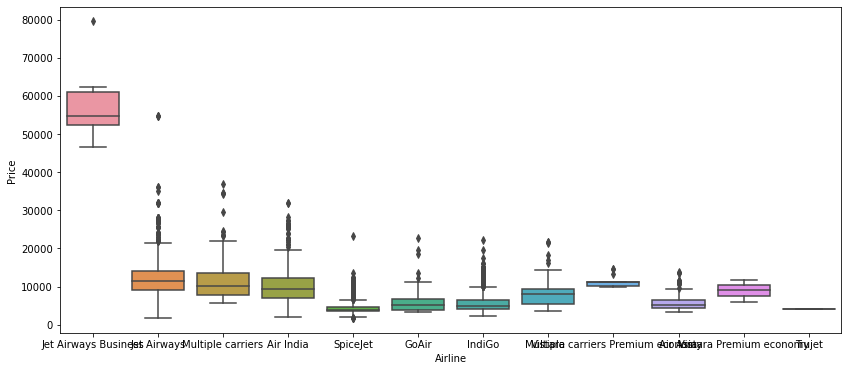

In [4]:
# Visualize the data
# Price comparision of different airlines
plt.figure(figsize=(14,6))
g = sns.boxplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False))

<AxesSubplot:xlabel='Price'>

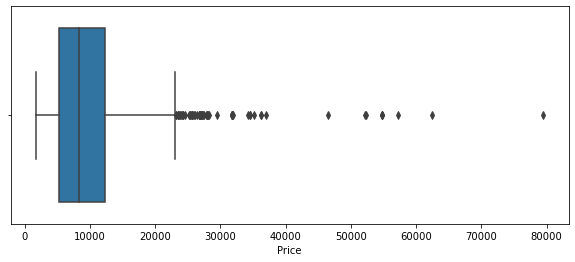

In [6]:
# Check for outliers
plt.figure(figsize=(10,4))
sns.boxplot(data['Price'])

In [7]:
data[data['Price']>40000]['Price']

657      52229
1478     54826
2618     54826
2924     79512
5372     62427
5439     54826
7351     46490
9715     52285
10364    57209
Name: Price, dtype: int64

In [8]:
# There are 9 prices which are above 40000. We can treat them as outliers and cap the price at 40000 and remove them.
data = data.drop(data[data['Price']>40000].index)

In [9]:
# Let's look at the null values first
data[data['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,Null,7480


In [10]:
# Only 1 row has both NA values. We can safely remove this row
data.drop(data[data['Route'].isna()].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10673 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10673 non-null  object
 1   Date_of_Journey  10673 non-null  object
 2   Source           10673 non-null  object
 3   Destination      10673 non-null  object
 4   Route            10673 non-null  object
 5   Dep_Time         10673 non-null  object
 6   Arrival_Time     10673 non-null  object
 7   Duration         10673 non-null  object
 8   Total_Stops      10673 non-null  object
 9   Additional_Info  10673 non-null  object
 10  Price            10673 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1000.6+ KB


# Airline Column

In [11]:
data['Airline'].value_counts()

Jet Airways                          3846
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
"""
From the data above, the bottom 4 categories hardly make 0.1% of the data. We could deal with them in 2 ways,
1. Add the data into the other categories
2. Remove the data altogether

We will experiment with the first method first.

Jet Airways Business ---> Jet Airways
Vistara Premium economy ---> Vistara
Multiple carriers Premium economy  ---> Multiple carriers
"""

In [12]:
data.loc[data['Airline'] == 'Jet Airways Business'] = 'Jet Airways'
data.loc[data['Airline'] == 'Vistara Premium economy'] = 'Vistara'
data.loc[data['Airline'] == 'Multiple carriers Premium economy'] = 'Multiple carriers'

# Only 1 value of the Trujet carrier is insignicant, we can include this row into Jet Airways
data.loc[data['Airline'] == 'Trujet'] = 'Jet Airways'

In [13]:
# Create dummy columns for all airlines
airline_dummies = pd.get_dummies(data['Airline'], drop_first=True)
airline_dummies

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0
10680,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,1


In [14]:
data.drop('Airline', axis = 1, inplace = True)

# Additional_Info Column

In [16]:
data['Additional_Info'].value_counts()

In [ ]:
# More than 80% data has Null data. We can safely remove this column.
data.drop('Additional_Info', axis = 1, inplace = True)

# Date of Journey Column

In [17]:
# Now we look at the Date_of_Journey column
data['Date_of_Journey'].value_counts()

18/05/2019           504
6/06/2019            503
21/05/2019           497
9/06/2019            495
12/06/2019           493
9/05/2019            484
21/03/2019           410
15/05/2019           405
27/05/2019           382
27/06/2019           355
24/06/2019           351
1/06/2019            342
3/06/2019            333
15/06/2019           328
24/03/2019           323
6/03/2019            306
27/03/2019           299
24/05/2019           286
6/05/2019            281
1/05/2019            277
12/05/2019           259
1/04/2019            257
3/03/2019            217
9/03/2019            200
15/03/2019           162
18/03/2019           154
01/03/2019           147
12/03/2019           142
9/04/2019            125
3/04/2019            110
21/06/2019           109
18/06/2019           105
09/03/2019           102
6/04/2019             99
03/03/2019            96
06/03/2019            95
27/04/2019            94
24/04/2019            92
3/05/2019             90
15/04/2019            89


In [18]:
# The last 3 rows have incorrect dates. Let's remove these rows as there are only 23 such records.
my_list = ['Multiple carriers', 'Jet Airways', 'Vistara']

for i in range(len(my_list)):
    data.drop(data[data['Date_of_Journey'] == my_list[i]].index, inplace=True)
    
data['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    410
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     306
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     217
9/03/2019     200
15/03/2019    162
18/03/2019    154
01/03/2019    147
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019      99
03/03/2019     96
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      46
Name: Date_of_Journey, dtype: int64

In [19]:
# Let's convert this column into datetime
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

# We will add another column named 'Day_of_Week'. The flight prices are high on certain days than others.
data['Day_of_Week'] = data['Date_of_Journey'].dt.day_name()

<AxesSubplot:xlabel='Day_of_Week', ylabel='Price'>

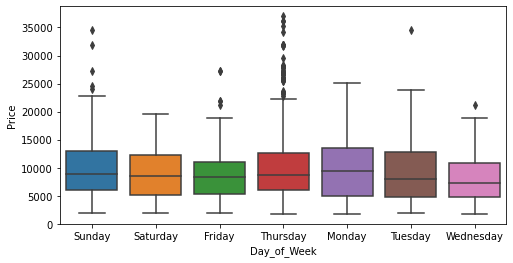

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'Day_of_Week', data = data, y = 'Price')

In [21]:
# Saturday, Friday, and Wednesday has lower prices as compared to the other days of the week
journey_day_dummies = pd.get_dummies(data['Day_of_Week'], drop_first=True)
data.drop('Day_of_Week', axis = 1, inplace = True)

journey_day_dummies

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
10678,0,0,0,0,0,1
10679,0,1,0,0,0,0
10680,0,1,0,0,0,0
10681,0,0,0,1,0,0


In [22]:
# We will add another column named 'Month'. Let's check how the prices vary in different months.
data['Month'] = data['Date_of_Journey'].dt.month

<AxesSubplot:xlabel='Month', ylabel='Price'>

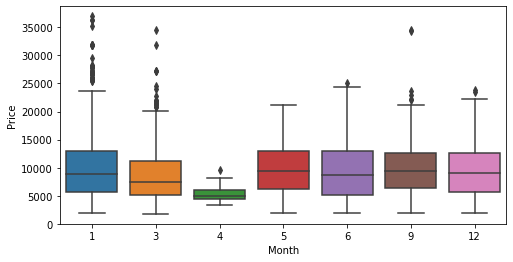

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x = 'Month', data = data, y = 'Price')

In [24]:
# Remove Date_of_Journey column
data.drop('Date_of_Journey', axis = 1, inplace = True)

# Dep_Time Column

In [25]:
# Split the hour and minutes using : as a separator
data['dep_time_hour'] = data['Dep_Time'].str.split(":").str[0]
data['dep_time_hour'] = data['dep_time_hour'].astype('int64')

In [26]:
data['dep_time_min'] = data['Dep_Time'].str.split(":").str[1]
data['dep_time_min'] = data['dep_time_min'].astype('int64')

In [27]:
data.drop('Dep_Time', axis = 1, inplace = True)
data.head()

,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Month,dep_time_hour,dep_time_min
0,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,3897,3,22,20
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,7662,1,5,50
2,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,13882,9,9,25
3,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,6218,12,18,5
4,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,13302,1,16,50


# Arrival_Time Column

In [28]:
# Getting the first 2 characters for the hour column
data['arr_time_hour'] = data['Arrival_Time'].str[:2]
data['arr_time_hour'] = data['arr_time_hour'].astype('int64')

In [29]:
# Getting the last 2 characters for the minutes column
data['arr_time_min'] = data['Arrival_Time'].str[3:5]
data['arr_time_min'] = data['arr_time_min'].astype('int64')

In [30]:
data.drop('Arrival_Time', axis = 1, inplace = True)
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Month,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min
0,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,3,22,20,1,10
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,50,13,15
2,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,9,25,4,25
3,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,18,5,23,30
4,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,16,50,21,35


# Duration

In [31]:
data['Duration'].value_counts()

2h 50m     549
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     328
          ... 
30h 10m      1
40h 20m      1
35h 35m      1
47h 40m      1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

In [32]:
# Function to extract the hour from the duration column
def extract_hour(col):
    str_list = col.split(" ")
    
    if len(str_list[0]) == 2:
        return int(str_list[0][0])
    
    else:
        return int(str_list[0][:2])

In [33]:
data['Duration_Hour'] = data['Duration'].apply(extract_hour)
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Month,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour
0,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,3,22,20,1,10,2
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,50,13,15,7
2,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,9,25,4,25,19
3,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,18,5,23,30,5
4,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,16,50,21,35,4


In [34]:
# Function to extract the minutes from the duration column
def extract_min(col):
    str_list = col.split(" ")
    
    try:
        if len(str_list[1]) == 2:
            return int(str_list[1][0])

        else:
            return int(str_list[1][:2])
        
    except:
        return 0

In [35]:
data['Duration_Min'] = data['Duration'].apply(extract_min)
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Month,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min
0,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,3,22,20,1,10,2,50
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,50,13,15,7,25
2,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,9,25,4,25,19,0
3,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,18,5,23,30,5,25
4,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,16,50,21,35,4,45


In [36]:
data.drop('Duration', axis = 1, inplace = True)
data.head()

,Source,Destination,Route,Total_Stops,Price,Month,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min
0,Banglore,New Delhi,BLR → DEL,non-stop,3897,3,22,20,1,10,2,50
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,50,13,15,7,25
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,9,25,4,25,19,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,18,5,23,30,5,25
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,16,50,21,35,4,45


# Total_Stops Column

In [37]:
data['Total_Stops'].value_counts()

1 stop      5604
non-stop    3488
2 stops     1518
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
# Define a function to convert no of stops to equal number of integer values
def flight_stop(col):
    if col == 'non-stop':
        return 0
    
    elif col == '1 stop':
        return 1
    
    elif col == '2 stops':
        return 2
    
    elif col == '3 stops':
        return 3
    
    else:
        return 4

In [39]:
data['Total_Stops'] = data['Total_Stops'].apply(flight_stop)
data.head()

,Source,Destination,Route,Total_Stops,Price,Month,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min
0,Banglore,New Delhi,BLR → DEL,0,3897,3,22,20,1,10,2,50
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,50,13,15,7,25
2,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,9,25,4,25,19,0
3,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,18,5,23,30,5,25
4,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,16,50,21,35,4,45


# Route

In [40]:
data['Route'].value_counts()

DEL → BOM → COK          2363
BLR → DEL                1550
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → JLR → HYD             1
BOM → UDR → DEL → HYD       1
BOM → GOI → HYD             1
CCU → IXB → DEL → BLR       1
CCU → IXA → BLR             1
Name: Route, Length: 127, dtype: int64

In [41]:
# Convert the flight route into corresponding columns
data['Route_1'] = data['Route'].str.split('→').str[0]
data['Route_2'] = data['Route'].str.split('→').str[1]
data['Route_3'] = data['Route'].str.split('→').str[2]
data['Route_4'] = data['Route'].str.split('→').str[3]
data['Route_5'] = data['Route'].str.split('→').str[4]

In [42]:
data.drop('Route', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Source         10656 non-null  object
 1   Destination    10656 non-null  object
 2   Total_Stops    10656 non-null  int64 
 3   Price          10656 non-null  object
 4   Month          10656 non-null  int64 
 5   dep_time_hour  10656 non-null  int64 
 6   dep_time_min   10656 non-null  int64 
 7   arr_time_hour  10656 non-null  int64 
 8   arr_time_min   10656 non-null  int64 
 9   Duration_Hour  10656 non-null  int64 
 10  Duration_Min   10656 non-null  int64 
 11  Route_1        10656 non-null  object
 12  Route_2        10656 non-null  object
 13  Route_3        7168 non-null   object
 14  Route_4        1564 non-null   object
 15  Route_5        46 non-null     object
dtypes: int64(8), object(8)
memory usage: 1.6+ MB


In [43]:
# Fill the null values in the Routes columns with 'None'
for i in ['Route_3', 'Route_4', 'Route_5']:
    data[i].fillna('None', inplace = True)

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    data[i] = le.fit_transform(data[i])

In [46]:
data.head()

,Source,Destination,Total_Stops,Price,Month,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,Banglore,New Delhi,0,3897,3,22,20,1,10,2,50,0,13,29,13,5
1,Kolkata,Banglore,2,7662,1,5,50,13,15,7,25,2,25,1,3,5
2,Delhi,Cochin,2,13882,9,9,25,4,25,19,0,3,32,4,5,5
3,Kolkata,Banglore,1,6218,12,18,5,23,30,5,25,2,34,3,13,5
4,Banglore,New Delhi,1,13302,1,16,50,21,35,4,45,0,34,8,13,5


# Source Column

In [47]:
data['Source'].value_counts()

Delhi       4521
Kolkata     2871
Banglore    2188
Mumbai       696
Chennai      380
Name: Source, dtype: int64

In [48]:
# Create dummy variables
source_dummies = pd.get_dummies(data['Source'], prefix = 'source', drop_first=True)
source_dummies

,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [49]:
data.drop('Source', axis = 1, inplace = True)

# Destination Column

In [50]:
data['Destination'].value_counts()

Cochin       4521
Banglore     2871
Delhi        1264
New Delhi     924
Hyderabad     696
Kolkata       380
Name: Destination, dtype: int64

In [51]:
# Create dummy variables
dest_dummies = pd.get_dummies(data['Destination'], prefix = 'des', drop_first=True)
dest_dummies

,des_Cochin,des_Delhi,des_Hyderabad,des_Kolkata,des_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [52]:
data.drop('Destination', axis = 1, inplace = True)

In [53]:
# Now we concat all the other dummy columns
final_data = pd.concat([airline_dummies, journey_day_dummies, source_dummies, dest_dummies, data], axis = 1)

In [54]:
final_data.head()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Monday,Saturday,Sunday,...,dep_time_min,arr_time_hour,arr_time_min,Duration_Hour,Duration_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,1,0,0,0,0,0.0,0.0,1.0,...,20.0,1.0,10.0,2.0,50.0,0.0,13.0,29.0,13.0,5.0
1,1,0,0,0,0,0,0,0.0,1.0,0.0,...,50.0,13.0,15.0,7.0,25.0,2.0,25.0,1.0,3.0,5.0
2,0,0,0,1,0,0,0,0.0,0.0,0.0,...,25.0,4.0,25.0,19.0,0.0,3.0,32.0,4.0,5.0,5.0
3,0,0,1,0,0,0,0,0.0,0.0,0.0,...,5.0,23.0,30.0,5.0,25.0,2.0,34.0,3.0,13.0,5.0
4,0,0,1,0,0,0,0,0.0,0.0,0.0,...,50.0,21.0,35.0,4.0,45.0,0.0,34.0,8.0,13.0,5.0


In [55]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10673 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air India          10673 non-null  uint8  
 1   GoAir              10673 non-null  uint8  
 2   IndiGo             10673 non-null  uint8  
 3   Jet Airways        10673 non-null  uint8  
 4   Multiple carriers  10673 non-null  uint8  
 5   SpiceJet           10673 non-null  uint8  
 6   Vistara            10673 non-null  uint8  
 7   Monday             10656 non-null  float64
 8   Saturday           10656 non-null  float64
 9   Sunday             10656 non-null  float64
 10  Thursday           10656 non-null  float64
 11  Tuesday            10656 non-null  float64
 12  Wednesday          10656 non-null  float64
 13  source_Chennai     10656 non-null  float64
 14  source_Delhi       10656 non-null  float64
 15  source_Kolkata     10656 non-null  float64
 16  source_Mumbai      106

In [56]:
# Fill all the NA values with 0 as they are just empty cells
final_data.fillna(value = 0, inplace = True)

# Model building

In [59]:
# Separate dependent and independent variable
X = final_data.drop('Price', axis = 1)
y = final_data['Price']

In [60]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [62]:
# Define a function to run all the above models
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def model_predict(input_model):
    print(f'The model is {input_model}.')
    model = input_model.fit(X_train, y_train)
    
    print(f'Training Score: {model.score(X_train, y_train)}')
    
    prediction = model.predict(X_test)
    print(f'The predictions are {prediction}')
    
    r2score = r2_score(y_test, prediction)
    print(f'The R2 Score is {r2score}.')
    
    print(f'MAE: {mean_absolute_error(y_test, prediction)}')
    print(f'MSE: {mean_squared_error(y_test, prediction)}')
    print(f'RMSE:{(np.sqrt(mean_squared_error(y_test,prediction)))}')

In [63]:
# Use different models for predictions
model_predict(LinearRegression())

The model is LinearRegression().
Training Score: 0.6040570785326229
The predictions are [ 6739.31472054  7479.37196423  4663.89522151 ... 10336.63243892
  8990.48771449  9574.76701107]
The R2 Score is 0.6199697871020649.
MAE: 1920.8779020770608
MSE: 7212545.769243811
RMSE:2685.618321587007


In [64]:
model_predict(LogisticRegression())

The model is LogisticRegression().
Training Score: 0.33047784767768706
The predictions are [7229 5117 5964 ... 8032 6628 9646]
The R2 Score is 0.36864548605013814.
MAE: 2091.840724547158
MSE: 11982398.172392255
RMSE:3461.5600778250628


In [65]:
model_predict(RandomForestRegressor())

The model is RandomForestRegressor().
Training Score: 0.9478291110821255
The predictions are [ 5093.11        6635.46333333  6591.18666667 ... 14354.01
  6654.42        6912.6575    ]
The R2 Score is 0.7902405559972212.
MAE: 1314.3252148432452
MSE: 3980998.19186612
RMSE:1995.2438928276713


In [66]:
model_predict(AdaBoostRegressor())

The model is AdaBoostRegressor().
Training Score: 0.5846978026352687
The predictions are [ 5123.11290323 10173.89122807 11513.44097035 ... 17952.20542636
  9247.25935288 10993.55518395]
The R2 Score is 0.5925553308556886.
MAE: 2257.5250652102955
MSE: 7732841.297612825
RMSE:2780.7986798063657


In [67]:
model_predict(GradientBoostingRegressor())

The model is GradientBoostingRegressor().
Training Score: 0.7625031995381779
The predictions are [ 6160.23401297  7539.33595006  5946.18060399 ... 15352.67034129
  8985.40711381  8178.5968561 ]
The R2 Score is 0.7666361834172226.
MAE: 1541.872141442324
MSE: 4428982.619970648
RMSE:2104.514818187472


In [69]:
model_predict(XGBRegressor())

The model is XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...).
Training Score: 0.9299945782177382
The predictions are [ 5658.4585  6368.268   6745.2812 ... 14797.16    5213.0723  7179.466 ]
The R2 Score is 0.836483820443705.
MAE: 1239.3161106121534
MSE: 3103353.0730842445
RMSE:1761.6336375887709


In [70]:
model_predict(KNeighborsRegressor())

The model is KNeighborsRegressor().
Training Score: 0.7389546163641565
The predictions are [ 5120.4  8582.2  4895.6 ... 11025.6  6941.   7349.6]
The R2 Score is 0.6374068944123347.
MAE: 1677.4175515302936
MSE: 6881609.095552779
RMSE:2623.282122752484


In [71]:
model_predict(DecisionTreeRegressor())

The model is DecisionTreeRegressor().
Training Score: 0.9674279690639626
The predictions are [ 5886.5  7480.   5964.  ... 17198.   6206.   6565.5]
The R2 Score is 0.648929834565075.
MAE: 1529.350952529669
MSE: 6662916.6589327
RMSE:2581.2626094476905


# Result Visualization

Text(0, 0.5, 'R2_Score')

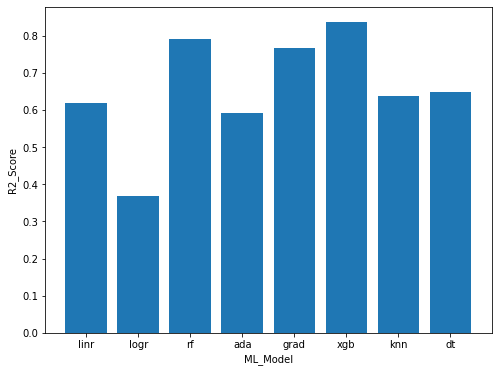

In [92]:
# Visualize the R2 Score across all models
d_r2score = {'linr': 0.619, 'logr': 0.368, 'rf': 0.790, 'ada': 0.592, 'grad': 0.766,
             'xgb': 0.836, 'knn': 0.637, 'dt': 0.648}

plt.figure(figsize=(8,6))
plt.bar(range(len(d_r2score)), list(d_r2score.values()), align='center')
plt.xticks(range(len(d_r2score)), list(d_r2score.keys()))
plt.xlabel('ML_Model')
plt.ylabel('R2_Score')

Text(0, 0.5, 'Mean Absolute Error')

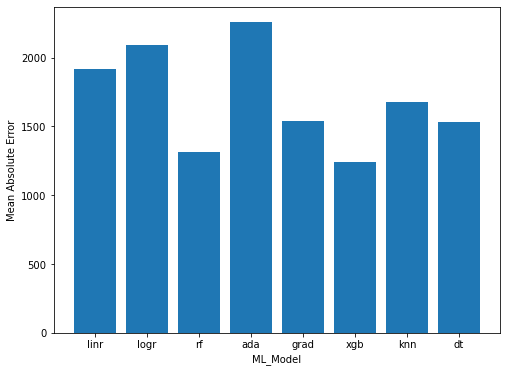

In [93]:
# Visualize the Mean Absolute Error across all models
d_mae = {'linr': 1920.87, 'logr': 2091.84, 'rf': 1314.32, 'ada': 2257.52, 'grad': 1541.87,
             'xgb': 1239.31, 'knn': 1677.41, 'dt': 1529.35}

plt.figure(figsize=(8,6))
plt.bar(range(len(d_mae)), list(d_mae.values()), align='center')
plt.xticks(range(len(d_mae)), list(d_mae.keys()))
plt.xlabel('ML_Model')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Squared Error')

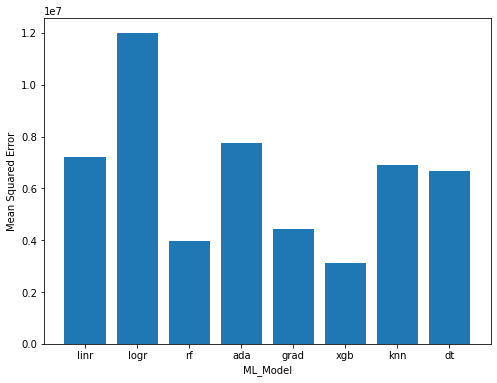

In [95]:
# Visualize the Mean Squared Error across all models
d_mse = {'linr': 7212545.76, 'logr': 11982398.17, 'rf': 3980998.19, 'ada': 7732841.29, 'grad': 4428982.61,
             'xgb': 3103353.073, 'knn': 6881609.09, 'dt': 6662916.65}

plt.figure(figsize=(8,6))
plt.bar(range(len(d_mse)), list(d_mse.values()), align='center')
plt.xticks(range(len(d_mse)), list(d_mse.keys()))
plt.xlabel('ML_Model')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Root Mean Squared Error')

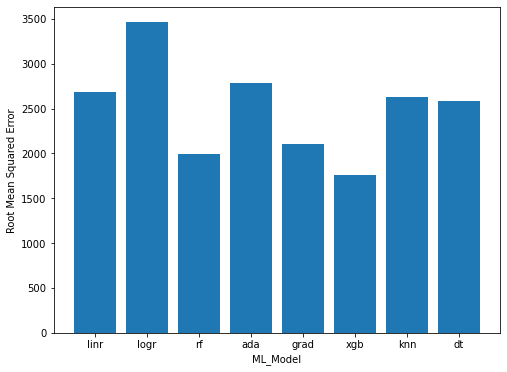

In [96]:
# Visualize the Root Mean Squared Error across all models
d_rmse = {'linr': 2685.61, 'logr': 3461.56, 'rf': 1995.24, 'ada': 2780.79, 'grad': 2104.51,
             'xgb': 1761.63, 'knn': 2623.28, 'dt': 2581.26}

plt.figure(figsize=(8,6))
plt.bar(range(len(d_rmse)), list(d_rmse.values()), align='center')
plt.xticks(range(len(d_rmse)), list(d_rmse.keys()))
plt.xlabel('ML_Model')
plt.ylabel('Root Mean Squared Error')

# Hyperparameter tuning

# XG Boost

In [77]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': [3, 5, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'n_estimators': [100, 500, 1000]
}

In [78]:
xgb_random = RandomizedSearchCV(estimator=XGBRegressor(),
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [79]:
xgb_random.fit(X_train,y_train)
xgb_random.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'subsample': 0.8999999999999999,
 'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.5}

In [80]:
prediction_xgb = xgb_random.predict(X_test)
print(r2_score(y_test,prediction_xgb))
print(mean_absolute_error(y_test, prediction_xgb))

0.8448259810614986
1223.135033056782


# Random Forest

In [81]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [82]:
rf=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

rf_random.best_params_

prediction = rf_random.predict(X_test)

print(r2_score(y_test,prediction))
print(mean_absolute_error(y_test, prediction))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.8099441030354291
1279.795675178655


# Conclusion
## XGBoost model without any parameter tuning performed the best with the least MAE of 1223.1 and R2 score of 0.845.